In [16]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import Input, layers, regularizers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix

In [ ]:
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# layers_to_freeze = 15

# for layer in model_resnet.layers[:layers_to_freeze]:
#     layer.trainable = False

# for layer in model_resnet.layers[layers_to_freeze:]:
#     layer.trainable = True


model = Sequential([
                    model_resnet,
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
                    BatchNormalization(),    
                    Dropout(0.5),
                    Dense(2, activation='softmax', kernel_regularizer = tf.keras.regularizers.l2(0.1))
                    ])


model.compile( 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
                loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                metrics = ['accuracy'])  

In [31]:
train_datagen = ImageDataGenerator(
                                    rotation_range = 30, 
                                    zoom_range = 0.20, 
                                    fill_mode = "nearest", 
                                    shear_range = 0.20, 
                                    horizontal_flip = True, 
                                    width_shift_range = 0.1, 
                                    height_shift_range = 0.1
                                    )
test_datagen = ImageDataGenerator(
                                    rescale=1./255
                                    )

train_generator = train_datagen.flow_from_directory(
        './data/train/',  # this is the target directory
        target_size=(250, 250),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './data/validation/',
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=5,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=2
                    )

model.save_weights('first_try.h5')

Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


C:\Users\chris\AppData\Local\Temp\ipykernel_10600\3703878968.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
5/5 [==============================] - 2s 319ms/step - loss: 10.2667 - accuracy: 0.9853 - val_loss: 11.8213 - val_accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 2s 370ms/step - loss: 10.0672 - accuracy: 0.9853 - val_loss: 11.7688 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 2s 378ms/step - loss: 9.8338 - accuracy: 1.0000 - val_loss: 11.7202 - val_accuracy: 0.4688
Epoch 4/20
5/5 [==============================] - 2s 374ms/step - loss: 9.6460 - accuracy: 1.0000 - val_loss: 11.5149 - val_accuracy: 0.4688
Epoch 5/20
5/5 [==============================] - 2s 433ms/step - loss: 9.5513 - accuracy: 0.9559 - val_loss: 11.7504 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 2s 406ms/step - loss: 9.2997 - accuracy: 0.9875 - val_loss: 12.0685 - val_accuracy: 0.4688
Epoch 7/20
5/5 [==============================] - 2s 335ms/step - loss: 9.1362 - accuracy: 0.9853 - val_loss: 12.0115 - val_accuracy: 0.5000
Epoch 8/20


In [32]:
def plotAccuracy(history):

    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except KeyError:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show() 
    
def plotLoss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show() 

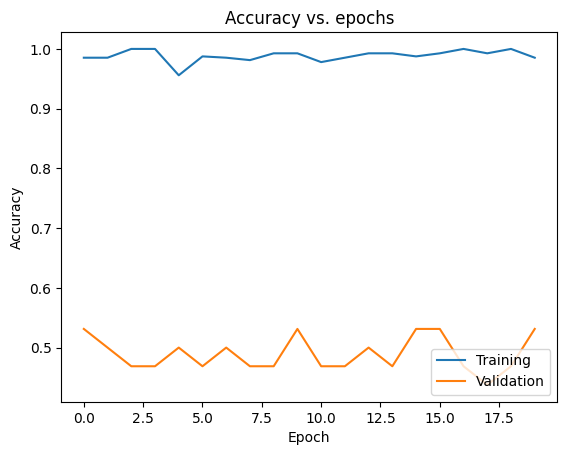

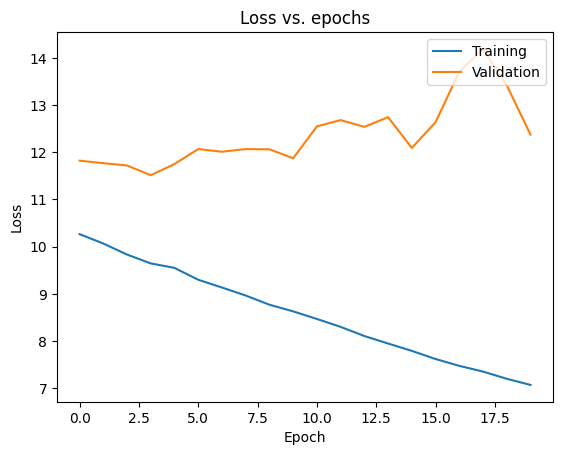

In [33]:
plotAccuracy(history)
plotLoss(history)

In [ ]:
history = model.fit(train_image_resnet, train_labels, epochs=30, validation_data=(test_image_resnet, test_labels))